# Predicting Default Payments with Fully-Connected NNs

The dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

## Inspecting the data

any comment about data dimensionality/distribution goes here

In [1]:
import pandas as pd

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [2]:
df_train_data = train_data.head() 
print(df_train_data)

      ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0  19193     200000    2          1         1   38     -2     -2     -2   
1   1131     230000    2          2         1   34      0      0      0   
2  17557      50000    2          2         2   42      0      0      0   
3  29901      20000    1          2         2   29      0      0     -2   
4  14696      30000    2          3         1   59      1      2      2   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...       2571       2571       2571      2772      2571      2571   
1      0  ...     155335     153427     150514      8913      5449      5339   
2      0  ...      49311      24663      24854      1763      2112      1756   
3     -2  ...          0          0          0         0         0         0   
4      2  ...      30467      29858      28898      1950       200      2492   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0     

In [3]:
df_test_data = test_data.head()
print(df_test_data)

      ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0   9956     180000    2          2         1   32     -1      2     -1   
1    879      50000    2          2         1   43      0      0      0   
2    554     240000    2          1         1   42      1     -1     -1   
3    142     180000    1          2         2   28     -1     -1     -1   
4  14630     320000    2          1         1   39      0      0      0   

   PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0      0  ...       7658       1000       1650       1000         0      7667   
1     -1  ...      20165      10732      10566      10757      1800      1775   
2     -2  ...          0          0          0          0      6370         0   
3     -1  ...        832        332        416        416         0       416   
4      0  ...     128832     133329      53870      13185      5000     15000   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0         0      1

In [4]:
df_train_data.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [5]:
# Controlla la dimensionalità del dataset di training e test
print("Dimensionalità del dataset di training:", train_data.shape)
print("Dimensionalità del dataset di test:", test_data.shape)

Dimensionalità del dataset di training: (25500, 25)
Dimensionalità del dataset di test: (4500, 24)


In [6]:
# Distribuzione della variabile target
print(train_data['default payment next month'].value_counts(normalize=True))

default payment next month
0    0.777059
1    0.222941
Name: proportion, dtype: float64


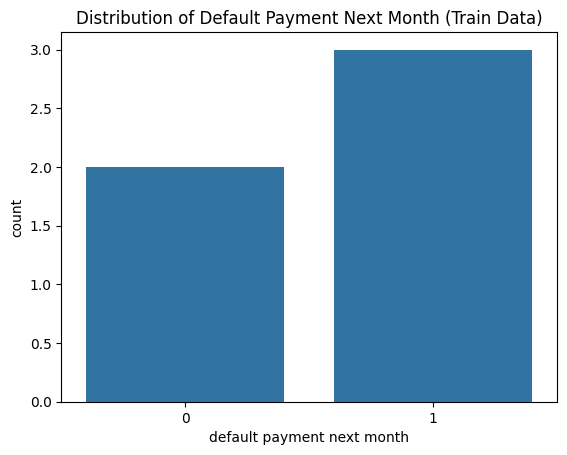

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'df' with your actual DataFrame name

# Plot the distribution of 'qualityRange'
sns.countplot(x='default payment next month', data=df_train_data)
plt.title('Distribution of Default Payment Next Month (Train Data)')
plt.show()


In [8]:
df_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          5 non-null      int64
 1   LIMIT_BAL                   5 non-null      int64
 2   SEX                         5 non-null      int64
 3   EDUCATION                   5 non-null      int64
 4   MARRIAGE                    5 non-null      int64
 5   AGE                         5 non-null      int64
 6   PAY_0                       5 non-null      int64
 7   PAY_2                       5 non-null      int64
 8   PAY_3                       5 non-null      int64
 9   PAY_4                       5 non-null      int64
 10  PAY_5                       5 non-null      int64
 11  PAY_6                       5 non-null      int64
 12  BILL_AMT1                   5 non-null      int64
 13  BILL_AMT2                   5 non-null      int64
 14  BILL_AMT3     

In [9]:
# Assuming df is your original DataFrame
default_df = df_train_data[['default payment next month']].copy()

# 'default_df' now contains only the 'default' column with the same attribute name


In [10]:
default_df.head()

,default payment next month
0,0
1,1
2,0
3,1
4,1


In [11]:
df_train_data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [12]:
df_train_data.duplicated().sum()

0

In [13]:
df_train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5.0,16495.6,10337.030270,1131.0,14696.0,17557.0,19193.0,29901.0
LIMIT_BAL,5.0,106000.0,100647.901121,20000.0,30000.0,50000.0,200000.0,230000.0
SEX,5.0,1.8,0.447214,1.0,2.0,2.0,2.0,2.0
EDUCATION,5.0,2.0,0.707107,1.0,2.0,2.0,2.0,3.0
MARRIAGE,5.0,1.4,0.547723,1.0,1.0,1.0,2.0,2.0
AGE,5.0,40.4,11.458621,29.0,34.0,38.0,42.0,59.0
PAY_0,5.0,-0.2,1.095445,-2.0,0.0,0.0,0.0,1.0
PAY_2,5.0,0.0,1.414214,-2.0,0.0,0.0,0.0,2.0
PAY_3,5.0,-0.4,1.673320,-2.0,-2.0,0.0,0.0,2.0
PAY_4,5.0,-0.4,1.673320,-2.0,-2.0,0.0,0.0,2.0


In [14]:
df_train_data["default payment next month"].value_counts()

default payment next month
1    3
0    2
Name: count, dtype: int64

In [15]:
df_train_data.corr()['default payment next month'].sort_values(ascending=False)

default payment next month    1.000000
PAY_0                         0.666667
EDUCATION                     0.645497
PAY_2                         0.645497
BILL_AMT5                     0.408846
BILL_AMT6                     0.404800
BILL_AMT1                     0.388264
BILL_AMT2                     0.349536
PAY_4                         0.327327
PAY_5                         0.327327
PAY_3                         0.327327
BILL_AMT4                     0.309810
BILL_AMT3                     0.308693
PAY_AMT1                      0.217160
PAY_6                         0.166667
PAY_AMT3                      0.127041
PAY_AMT4                      0.080192
PAY_AMT5                      0.063473
AGE                           0.031867
PAY_AMT6                      0.004536
PAY_AMT2                     -0.113880
ID                           -0.165971
MARRIAGE                     -0.166667
LIMIT_BAL                    -0.172329
SEX                          -0.408248
Name: default payment nex

In [16]:
columns = [col for col in df_train_data.columns if(col != "default payment next month")]

plt.figure(figsize=(14,len(columns)*3))

<Figure size 1400x7200 with 0 Axes>

<Figure size 1400x7200 with 0 Axes>

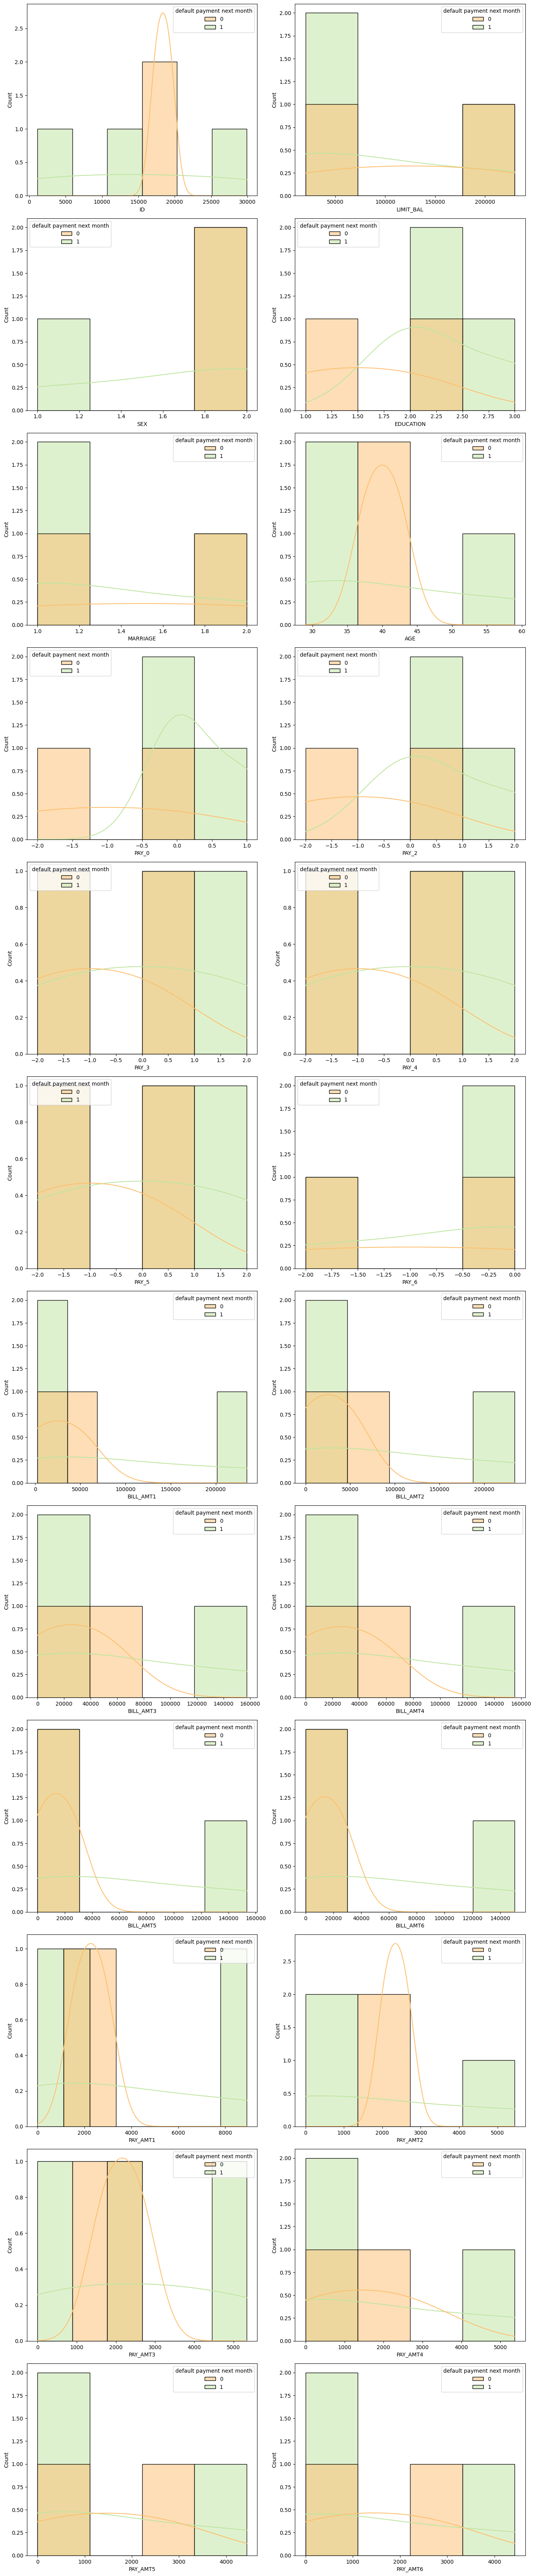

In [17]:
def loadQualityCorrHP(df, columns):
    plt.figure(figsize=(14,len(columns)*3))
    for i,column in enumerate(columns):
        plt.subplot( len( columns ) // 2 + 1, 2, i + 1)
        sns.histplot( x = column, hue = "default payment next month", data=df, kde=True, palette="Spectral")
    plt.tight_layout()

loadQualityCorrHP(df_train_data, columns)

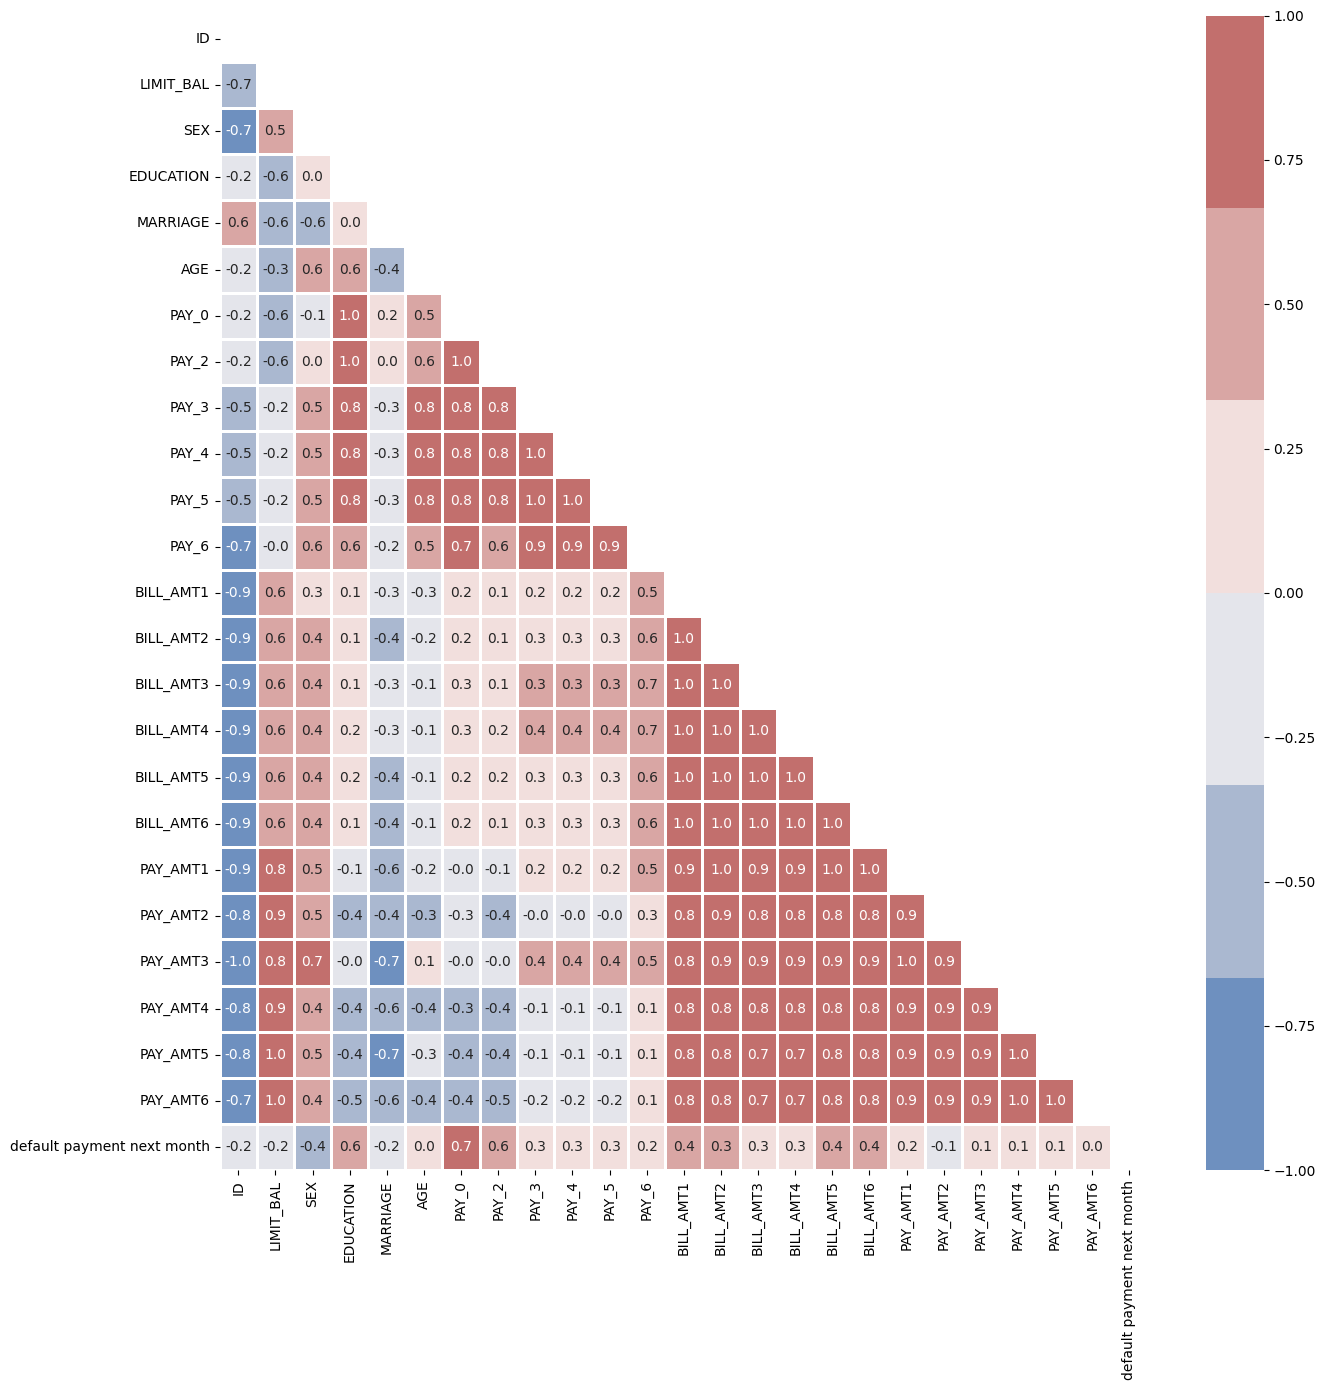

In [18]:
import numpy as np

def loadQualityCorrHM(df):
    plt.figure(figsize=(14,14))
    corrMatrix = df.corr()
    heatmapMask = np.triu(np.ones_like(corrMatrix))
    sns.heatmap(corrMatrix, linewidths=1, annot=True, fmt=".1f", vmin=-1, vmax=1, cmap=sns.color_palette("vlag"), mask=heatmapMask)
    plt.tight_layout()

loadQualityCorrHM(df_train_data)

C:\Users\lperf\AppData\Local\Temp\ipykernel_7260\3433804927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["default payment next month"] = pd.cut(df["default payment next month"], bins=[-np.inf, 4, 6, np.inf], labels=["3-4","5-6","7-8"])


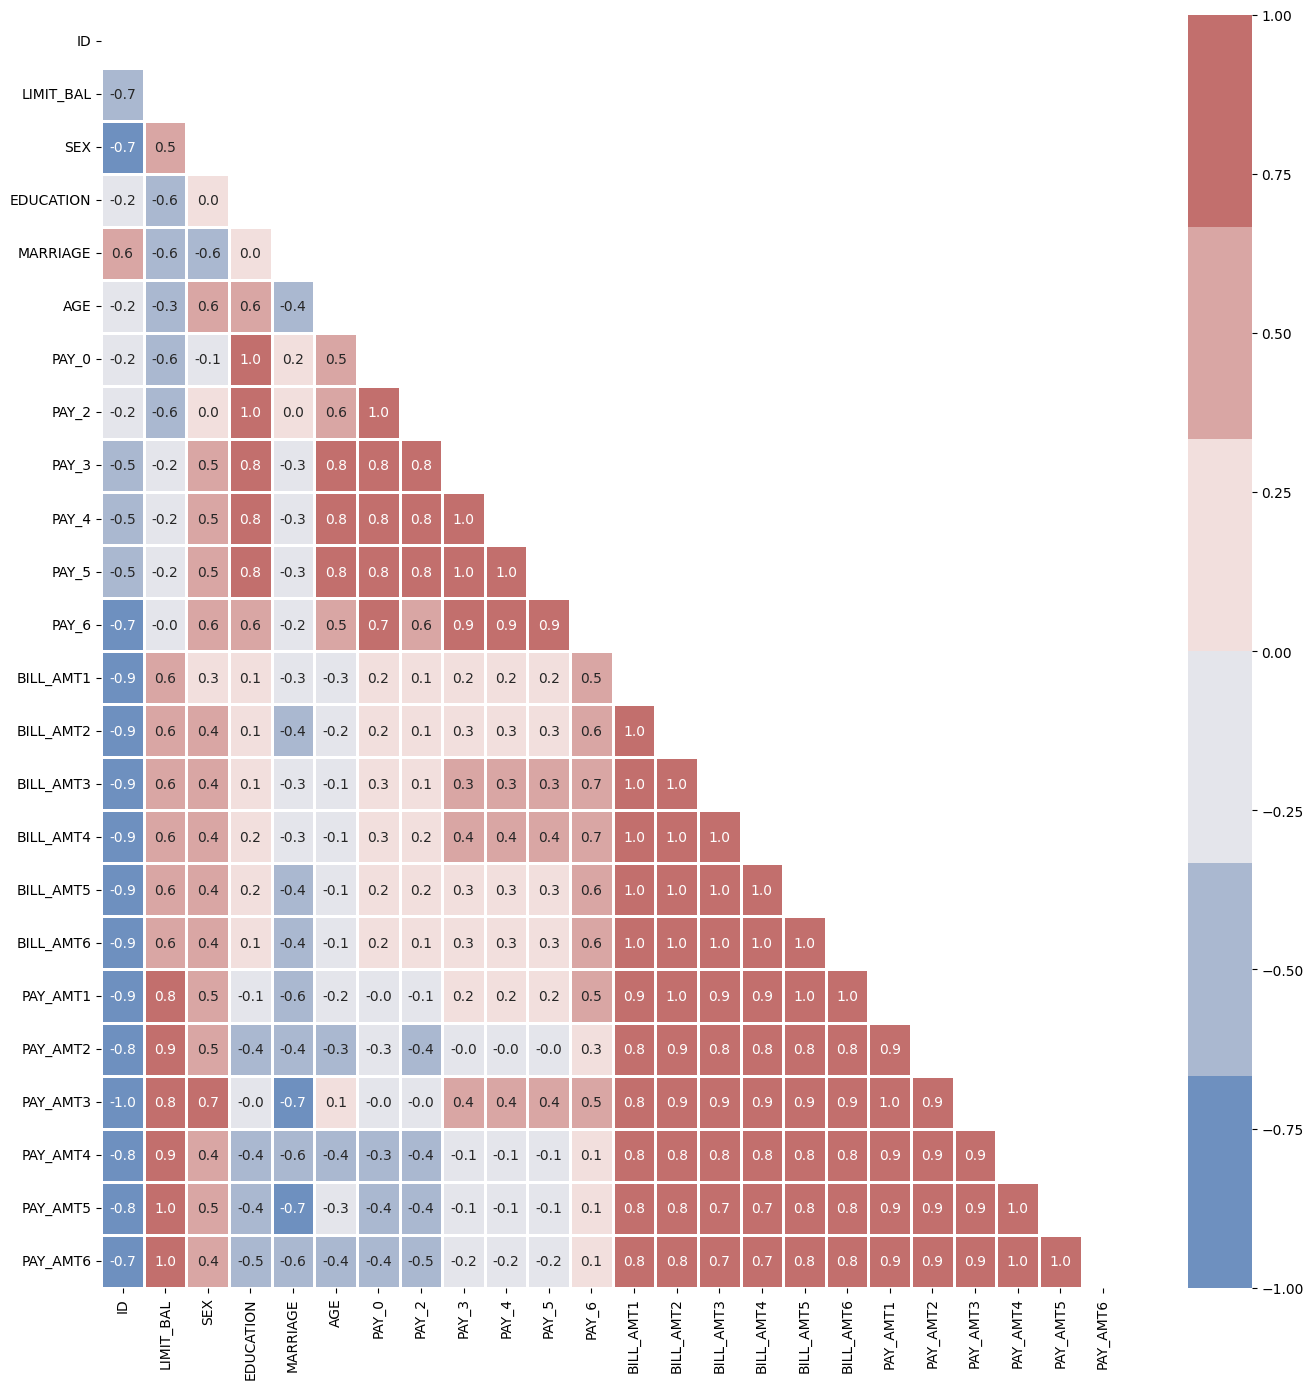

In [19]:
def loadCategorizedQualityCorrHM(df):
    df["default payment next month"] = pd.cut(df["default payment next month"], bins=[-np.inf, 4, 6, np.inf], labels=["3-4","5-6","7-8"])
    plt.figure(figsize=(14,14))
    corrMatrix = df.corr(numeric_only=True)
    heatmapMask = np.triu(np.ones_like(corrMatrix))
    sns.heatmap(corrMatrix, linewidths=1, annot=True, fmt=".1f", vmin=-1, vmax=1, cmap=sns.color_palette("vlag"), mask=heatmapMask)
    plt.tight_layout()

loadCategorizedQualityCorrHM(df_train_data)

## Preparing the data

describe the choice made during the preprocessing operations, also taking into account the previous considerations during the data inspection.

## Building the network

any description/comment about the procedure you followed in the choice of the network structure and hyperparameters goes here, together with consideration about the training/optimization procedure (e.g. optimizer choice, final activations, loss functions, training metrics)

## Analyze and comment the training results

here goes any comment/visualization of the training history and any initial consideration on the training results  

## Validate the model and comment the results

please describe the evaluation procedure on a validation set, commenting the generalization capability of your model (e.g. under/overfitting). You may also describe the performance metrics that you choose: what is the most suitable performance measure (or set of performance measures) in this case/dataset, according to you? Why?

## Make predictions (on the provided test set)

Based on the results obtained and analyzed during the training and the validation phases, what are your (rather _personal_) expectations with respect to the performances of your model on the blind external test set? Briefly motivate your answer.

# OPTIONAL -- Export the predictions in the format indicated in the assignment release page and verify you prediction on the [assessment page](https://aml-assignmentone-2425.streamlit.app/).